In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append("/Volumes/GoogleDrive/My Drive/XPS/XPS_Library")
from copy import deepcopy as dc
import xps
# from xps import load_excel
# from xps.pyfit_gui import guipyter
import xps.sample
# import xps.io
# from xps.initialize_xps_data import *
# from lmfit.models import GaussianModel, LorentzianModel, PseudoVoigtModel, SkewedVoigtModel
# from xps.gui_element_dicts import *
import matplotlib.pyplot as plt
import numpy as np

In [14]:
import sys
sys.path.append("/Volumes/GoogleDrive/My Drive/XPS/XPS_Library")
from copy import deepcopy as dc
import xps
# from xps import load_excel

# from xps.pyfit_gui import guipyter
import xps.sample
# import xps.io
from xps.gui_element_dicts import *
from xps import VAMAS as vm


# from xps.initialize_xps_data import *
# from lmfit.models import GaussianModel, LorentzianModel, PseudoVoigtModel, SkewedVoigtModel


import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


import numpy as np

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
    }


<IPython.core.display.Javascript object>

In [21]:
f = open("spectra_colors.txt", "r")
spectra_colors = {line.replace('\n','').split()[0]:line.replace('\n','').split()[1] for line in f.readlines() }
f.close()

In [22]:
### Create Dicitonary for the crop limits
croplimdic = {}
croplimdic['Si2p'] = [(100,105.5), 'linear']
# croplimdic['Si2p'] = [(98.5,108), 'UT2', (681,1,355,0), (0,-1)]

# croplimdic['Ti2p'] = [(452.5,470), 'shirley']
croplimdic['Ti2p'] = [(452.5,470), 'UT2', (681,1,355,0), (0,-1)]

croplimdic['O1s'] = [(529,537 ), 'shirley']
# croplimdic['O1s'] = [o1stou.E_fit_range, 'UT2', (956,1,355,0), (0,-1)]
# croplimdic['O1s'] = [(529,547), 'UT2', (956,1,355,0), (0,-1)]

croplimdic['N1s'] = [(400,405), 'shirley']
# croplimdic['N1s'] = [(394,402), 'UT2', (681,1,355,0), (0,-1)]

croplimdic['C1s'] = [(282,295), 'shirley']
# croplimdic['C1s'] = [c1stou.E_fit_range, 'UT2', (1055,1,355,0), (0,-1)]

croplimdic['F1s'] = [(682.5,693.85), 'shirley']
croplimdic['Nb3d'] = [(201,212.5), 'shirley']
# croplimdic['Nb3d'] = [(394,402), 'UT2', (681,1,355,0), (0,-1)]
croplimdic['Mo3d'] = [(225,237), 'shirley']

croplimdic['Valence'] = [(0,0), 'shirley']
croplimdic['XPS'] = [(0,0), 'shirley']

In [23]:
mon218_DP_2_vam = vm.VAMASExperiment('/Volumes/GoogleDrive/My Drive/XPS/201222_Hydrazine_Nitrides/201222_216-MoN_218-MoN_214-NbN_DP/\
201222_216-MoN_218-MoN_214-NbN_DP/X-Ray001-200um-FG OFF/218_MoN_300C_DP_p2/218_MoN_300C_DP_p2/\
218_mon_300c_dp_p2.vms')

shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before convergence.
shirley: Max iterations exceeded before conver

C1s
F1s
Mo3d
N1s
O1s
Si2p
V.B.
XPSSurvey


Text(0.5, 0, 'Depth')

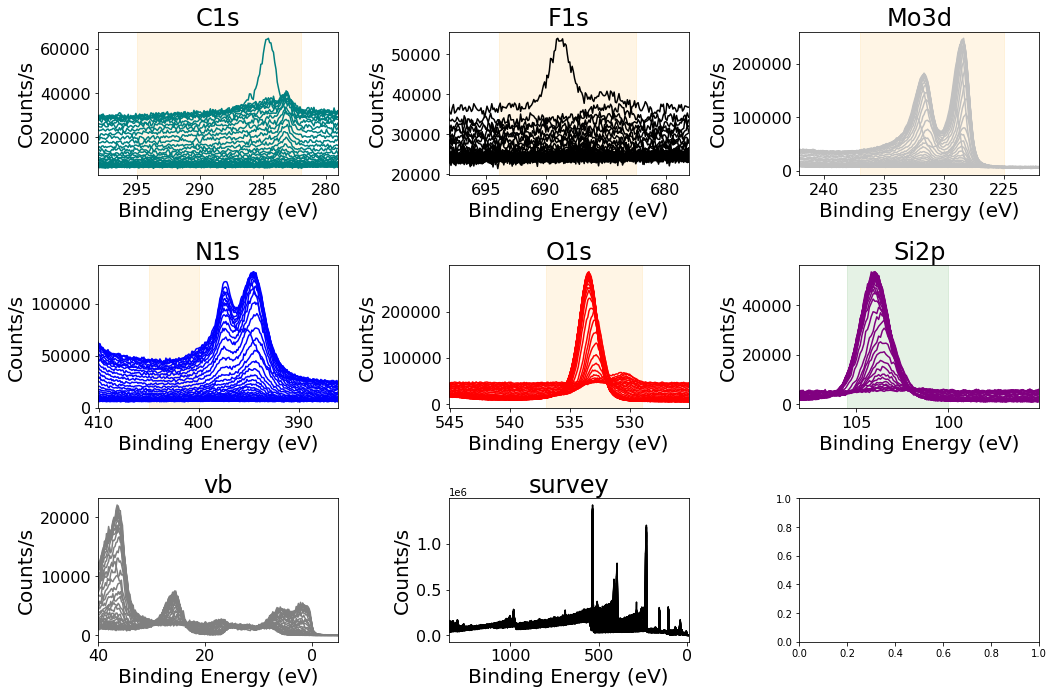

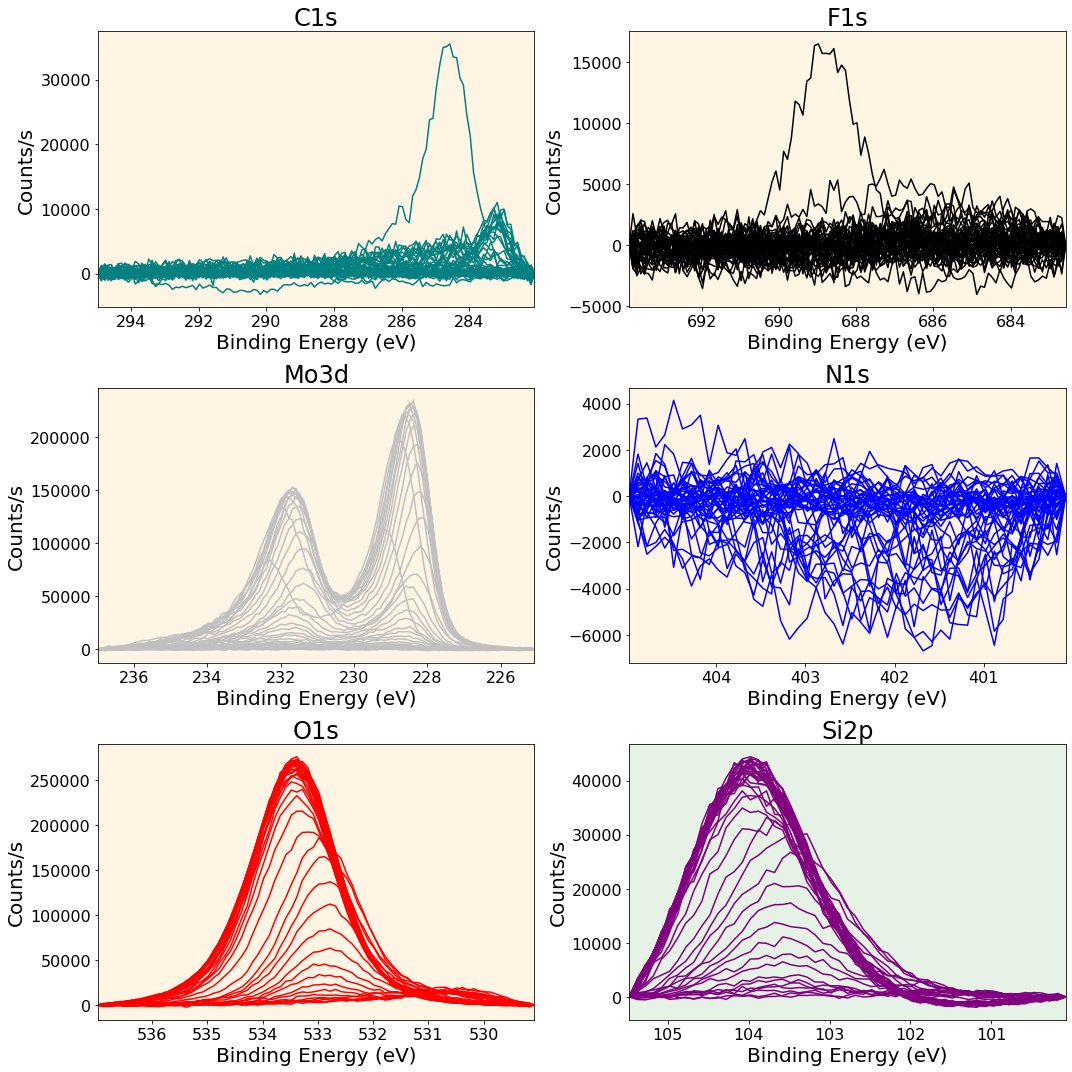

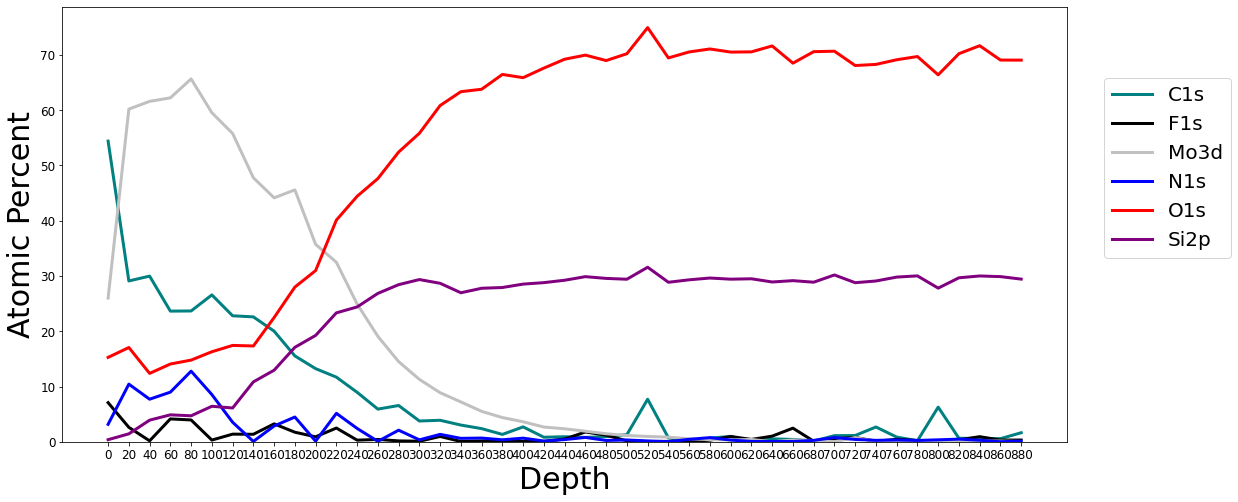

In [25]:
mon_218_DP_2 = xps.sample.sample(dataload_obj = mon218_DP_2_vam ,\
                    bkgrd_subtraction_dict = croplimdic,overview=True,plotspan=True,spectra_colors = spectra_colors,sputter_time=20)
mon_218_DP_2.ax_dict['Atomic_Percent'].tick_params(labelsize = 12)
mon_218_DP_2.ax_dict['Atomic_Percent'].set_xlabel('Depth')

In [10]:
from lmfit.models import GaussianModel, LorentzianModel, PseudoVoigtModel, SkewedVoigtModel
from xps.helper_functions import guess_from_data

# Oxygen

## 2 peaks

In [27]:
from lmfit.models import GaussianModel, LorentzianModel, PseudoVoigtModel, SkewedVoigtModel

# i = 0
x = mon_218_DP_2.O1s.esub
y = mon_218_DP_2.O1s.isub[0]

guess_amp, guess_cent = guess_from_data(x,y, 0, 530, lims=2, ampscale=1.0, sigscale=1.0)
# guess_amp, guess_cent = guess_from_data(y, x, 0, 207, lims=2, ampscale=1.0, sigscale=1.0)


                          
"""PseudoVoigt Lineshape for the N""" 
### TiO lines
pseudovoigtO_1 = PseudoVoigtModel(prefix='O1_')
pars_O = pseudovoigtO_1.guess(y, x=x)
pars_O.update(pseudovoigtO_1.make_params())

pseudovoigtO_2 = PseudoVoigtModel(prefix='O2_')
pars_O.update(pseudovoigtO_2.make_params())

# ###TiN Shake up peaks
# pseudovoigtN_sat = PseudoVoigtModel(prefix='TiO_sat_')
# pars_O.update(pseudovoigtN_sat.make_params())


                           
                          
"""Build the Composite Model"""                          
                          
Omod = pseudovoigtO_1 + pseudovoigtO_2

paramscomp_O = Omod.make_params()



"""PseudoVoigt Lineshape for the TiN """                          

paramscomp_O['O1_amplitude'].set(guess_amp,vary = 1)
paramscomp_O['O1_center'].set(530, vary=1)
paramscomp_O['O1_fwhm'].set(1.1, vary=1)
paramscomp_O['O1_fraction'].set(0.95, vary=1)

"""PseudoVoigt Lineshape for the TiON """   

paramscomp_O['O2_amplitude'].set(40000, vary = 1)
paramscomp_O['O2_center'].set(531, vary =1)
paramscomp_O['O2_fwhm'].set(1.3, vary = 1)
paramscomp_O['O2_fraction'].set(vary=1)

                          



In [39]:
Omod._param_names

['O1_sigma',
 'O1_fraction',
 'O1_fwhm',
 'O1_height',
 'O2_sigma',
 'O2_fraction',
 'O2_fwhm',
 'O2_height']

In [48]:
[comp.prefix for comp in Omod.components]

['O1_', 'O2_']

In [30]:
dir(Omod)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_bad_arg',
 '_bad_op',
 '_forbidden_args',
 '_func_allargs',
 '_func_haskeywords',
 '_get_state',
 '_hint_names',
 '_invalid_hint',
 '_invalid_ivar',
 '_invalid_par',
 '_known_ops',
 '_make_all_args',
 '_name',
 '_names_collide',
 '_param_names',
 '_param_root_names',
 '_parse_params',
 '_prefix',
 '_reprstring',
 '_residual',
 '_set_paramhints_prefix',
 '_set_state',
 '_strip_prefix',
 'components',
 'copy',
 'def_vals',
 'dump',
 'dumps',
 'eval',
 'eval_components',
 'fit',
 'func',
 'guess',
 'independent_vars',
 'left',
 'load',
 'loads',
 'make_funcarg

In [42]:
Omod._prefix

''

In [12]:
from lmfit.model import save_model

In [17]:
save_model(Omod,'/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/O/O_model_2comp_model.sav')

In [27]:
import os

In [13]:
import pickle

In [29]:
f = open('/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/load_model_info.pkl', 'rb')   # 'r' for reading; can be omitted
load_dict = pickle.load(f)         # load file content as mydict
f.close() 



In [23]:
with open('/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/load_model_info.pkl', 'wb') as f:
    pickle.dump(load_dict, f)
f.close()

In [30]:
load_dict

{'C1s_5comp': {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/C/C1s_5comp_params.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/C/C1s_model_5comp.sav',
  'pairlist': [('C1_',), ('C2_',), ('C3_',), ('C4_',), ('C5_',)],
  'element_ctrl': [0, 1, 2, 3, 4]},
 'O1s_3comp': {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/O/O1s_3comp_params.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/O/O_model_3comp.sav',
  'pairlist': [('O1_',), ('O2_',), ('O3_',)],
  'element_ctrl': [0, 1, 2]},
 'Nb3d': {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/Nb/Nb3d_Standard.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/Nb/Nb3d_model.sav',
  'pairlist': [('Nb_52_', 'Nb_32_'),
   ('Nb2O5_52_', 'Nb2O5_32_'),
   ('NbO_52_', 'NbO_32_'),
   ('NbO2_52_', 'NbO2_32_')],
  'element_ctrl': [0, 2, 4, 6]},
 'C1s': {'params_path': '/Volumes/GoogleDriv

In [16]:
load_dict['O1s_2comp'] = {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/O/O1s_2comp_params.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/O/O_model_2comp.sav',
  'pairlist': [('O1_',), ('O2_',)],
  'element_ctrl': [0, 1]}

## 3 peaks

In [6]:
from lmfit.models import GaussianModel, LorentzianModel, PseudoVoigtModel, SkewedVoigtModel
from xps.helper_functions import guess_from_data
# i = 0
x = N2plas.data['O1s']['energy']
y = N2plas.data['O1s']['intensity'][1]

guess_amp, guess_cent = guess_from_data(x,y, 0, 530, lims=2, ampscale=1.0, sigscale=1.0)
# guess_amp, guess_cent = guess_from_data(y, x, 0, 207, lims=2, ampscale=1.0, sigscale=1.0)


                          
"""PseudoVoigt Lineshape for the N""" 
### TiO lines
pseudovoigtO_1 = PseudoVoigtModel(prefix='O1_')
pars_O = pseudovoigtO_1.guess(y, x=x)
pars_O.update(pseudovoigtO_1.make_params())

pseudovoigtO_2 = PseudoVoigtModel(prefix='O2_')
pars_O.update(pseudovoigtO_2.make_params())

pseudovoigtO_3 = PseudoVoigtModel(prefix='O3_')
pars_O.update(pseudovoigtO_3.make_params())

# ###TiN Shake up peaks
# pseudovoigtN_sat = PseudoVoigtModel(prefix='TiO_sat_')
# pars_O.update(pseudovoigtN_sat.make_params())


                           
                          
"""Build the Composite Model"""                          
                          
Omod = pseudovoigtO_1 + pseudovoigtO_2 + pseudovoigtO_3

paramscomp_O = Omod.make_params()



"""PseudoVoigt Lineshape for the TiN """                          

paramscomp_O['O1_amplitude'].set(guess_amp,vary = 1)
paramscomp_O['O1_center'].set(530, vary=1)
paramscomp_O['O1_fwhm'].set(1.1, vary=1)
paramscomp_O['O1_fraction'].set(0.95, vary=1)

"""PseudoVoigt Lineshape for the TiON """   

paramscomp_O['O2_amplitude'].set(40000, vary = 1)
paramscomp_O['O2_center'].set(531, vary =1)
paramscomp_O['O2_fwhm'].set(1.3, vary = 1)
paramscomp_O['O2_fraction'].set(vary=1)

                          
"""PseudoVoigt Lineshape for the TiON """   

paramscomp_O['O3_amplitude'].set(40000, vary = 1)
paramscomp_O['O3_center'].set(531, vary =1)
paramscomp_O['O3_fwhm'].set(1.3, vary = 1)
paramscomp_O['O3_fraction'].set(vary=1)



NameError: name 'N2plas' is not defined

In [15]:
from lmfit.model import save_model

In [17]:
save_model(Omod,'/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/O/O_model_3comp_model.sav')

In [49]:
with open('/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/C/C1s_5comp_params.pkl', 'wb') as f:
    pickle.dump(paramscomp_C, f)
f.close()

In [19]:
import pickle

In [81]:
f = open('/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/load_model_info.pkl', 'rb')   # 'r' for reading; can be omitted
load_dict = pickle.load(f)         # load file content as mydict
f.close() 



In [82]:
load_dict

{'C1s_5comp': {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/C/C1s_5comp_params.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/C/C1s_model_5comp.sav',
  'pairlist': [('C1_',), ('C2_',), ('C3_',), ('C4_',), ('C5_',)],
  'element_ctrl': [0, 1, 2, 3, 4]},
 'O1s_3comp': {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/O/O1s_3comp_params.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/O/O_model_3comp.sav',
  'pairlist': [('O1_',), ('O2_',), ('O3_',)],
  'element_ctrl': [0, 1, 2]},
 'Nb3d': {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/Nb/Nb3d_Standard.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/Nb/Nb3d_model.sav',
  'pairlist': [('Nb_52_', 'Nb_32_'),
   ('Nb2O5_52_', 'Nb2O5_32_'),
   ('NbO_52_', 'NbO_32_'),
   ('NbO2_52_', 'NbO2_32_')],
  'element_ctrl': [0, 2, 4, 6]},
 'C1s': {'params_path': '/Volumes/GoogleDriv

In [77]:
load_dict['Nb3d'] = {}
load_dict['Nb3d']['params_path'] = '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/Nb/Nb3d_Standard.pkl'
load_dict['Nb3d']['model_path'] = '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/Nb/Nb3d_model.sav'
load_dict['Nb3d']['pairlist'] =[('Nb_52_','Nb_32_'),('Nb2O5_52_','Nb2O5_32_'),('NbO_52_','NbO_32_'),('NbO2_52_','NbO2_32_')]

load_dict['Nb3d']['element_ctrl'] = [0, 2, 4, 6]

In [65]:
load_dict['C1s_5comp'] = {}
load_dict['C1s_5comp']['params_path'] = '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/C/C1s_5comp_params.pkl'
load_dict['C1s_5comp']['model_path'] = '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/C/C1s_model_5comp.sav'
load_dict['C1s_5comp']['pairlist'] =[('C1_',), ('C2_',), ('C3_',), ('C4_',), ('C5_',)]
load_dict['C1s_5comp']['element_ctrl'] = [0, 1, 2, 3, 4]


In [66]:
load_dict['C1s'] = {}
load_dict['C1s']['params_path'] = '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/C/C1s_standard_params.pkl'
load_dict['C1s']['model_path'] = '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/C/C1s_model.sav'
load_dict['C1s']['pairlist'] =[('C1_',), ('C2_',), ('C3_',), ('C4_',), ('C5_',)]
load_dict['C1s']['element_ctrl'] = [0, 1, 2, 3, 4]

In [67]:
load_dict['O1s_3comp'] = {}
load_dict['O1s_3comp']['params_path'] = '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/O/O1s_3comp_params.pkl'
load_dict['O1s_3comp']['model_path'] = '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/O/O_model_3comp.sav'
load_dict['O1s_3comp']['pairlist'] =[('O1_',), ('O2_',), ('O3_',)]
load_dict['O1s_3comp']['element_ctrl'] = [0, 1, 2]



In [83]:
load_dict['Si2p'] = {}
load_dict['Si2p']['params_path'] = '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/Si/Si2p_doublet_params.pkl'
load_dict['Si2p']['model_path'] = '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/Si/Si_doublet_model.sav'
load_dict['Si2p']['pairlist'] =[('Si_32_','Si_12_'),('SiOx1_32_','SiOx1_12_'),('SiOx2_32_','SiOx2_12_'),\
               ('SiOx3_32_','SiOx3_12_'),('SiOx4_32_','SiOx4_12_')]
load_dict['Si2p']['element_ctrl'] = [0,2,4,6,8]


In [84]:
load_dict

{'C1s_5comp': {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/C/C1s_5comp_params.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/C/C1s_model_5comp.sav',
  'pairlist': [('C1_',), ('C2_',), ('C3_',), ('C4_',), ('C5_',)],
  'element_ctrl': [0, 1, 2, 3, 4]},
 'O1s_3comp': {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/O/O1s_3comp_params.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/O/O_model_3comp.sav',
  'pairlist': [('O1_',), ('O2_',), ('O3_',)],
  'element_ctrl': [0, 1, 2]},
 'Nb3d': {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/Nb/Nb3d_Standard.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/Nb/Nb3d_model.sav',
  'pairlist': [('Nb_52_', 'Nb_32_'),
   ('Nb2O5_52_', 'Nb2O5_32_'),
   ('NbO_52_', 'NbO_32_'),
   ('NbO2_52_', 'NbO2_32_')],
  'element_ctrl': [0, 2, 4, 6]},
 'C1s': {'params_path': '/Volumes/GoogleDriv

In [87]:
pars= pickle.load(open("//Volumes/GoogleDrive/My Drive/XPS/200914_Res025_026_027/fit_parameters/\
Res_015_Si2p_doubs_adj_fitparams.pkl","rb"))

In [88]:
with open('/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/Si/Si2p_doublet_params.pkl', 'wb') as f:
    pickle.dump(pars, f)
f.close()

In [85]:
with open('/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/load_model_info.pkl', 'wb') as f:
    pickle.dump(load_dict, f)
f.close()

In [89]:
import pyqtgraph as pg
pg.plot(N2plas.data['Si2p']['intensity'][1])

# Silicon

## Silicon with 4 oxidation states (doublest)

In [79]:
# x = res_015.data['Si2p']['energy']
# y = res_015.data['Si2p']['intensity'][0]
x = N2plas.data['Si2p']['energy']
y = N2plas.data['Si2p']['intensity'][1]
guess_amp, guess_cent = guess_from_data(x,y, 0, 100, lims=2, ampscale=1.0, sigscale=1.0)

"""PseudoVoigt Lineshape for the Si""" 
### Si Doublet
pseudovoigtSi_32 = PseudoVoigtModel(prefix='Si_32_')
pars_Si = pseudovoigtSi_32.guess(y, x=x)
pars_Si.update(pseudovoigtSi_32.make_params())

pseudovoigtSi_12 = PseudoVoigtModel(prefix='Si_12_')
pars_Si.update(pseudovoigtSi_12.make_params())

### SiO
pseudovoigtSiOx_1_32 = PseudoVoigtModel(prefix='SiOx1_32_')
pars_Si.update(pseudovoigtSiOx_1_32.make_params())
pseudovoigtSiOx_1_12 = PseudoVoigtModel(prefix='SiOx1_12_')
pars_Si.update(pseudovoigtSiOx_1_12.make_params())

### Si2O3 
pseudovoigtSiOx_2_32 = PseudoVoigtModel(prefix='SiOx2_32_')
pars_Si.update(pseudovoigtSiOx_2_32.make_params())
pseudovoigtSiOx_2_12 = PseudoVoigtModel(prefix='SiOx2_12_')
pars_Si.update(pseudovoigtSiOx_2_12.make_params())

### Si2O 
pseudovoigtSiOx_3_32 = PseudoVoigtModel(prefix='SiOx3_32_')
pars_Si.update(pseudovoigtSiOx_3_32.make_params())
pseudovoigtSiOx_3_12 = PseudoVoigtModel(prefix='SiOx3_12_')
pars_Si.update(pseudovoigtSiOx_3_12.make_params())

### SiO2 
pseudovoigtSiOx_4_32 = PseudoVoigtModel(prefix='SiOx4_32_')
pars_Si.update(pseudovoigtSiOx_4_32.make_params())
pseudovoigtSiOx_4_12 = PseudoVoigtModel(prefix='SiOx4_12_')
pars_Si.update(pseudovoigtSiOx_4_12.make_params())


mod_Si = pseudovoigtSi_32 + pseudovoigtSi_12 + pseudovoigtSiOx_1_32 + pseudovoigtSiOx_1_12 \
+ pseudovoigtSiOx_2_32 + pseudovoigtSiOx_2_12 + pseudovoigtSiOx_3_32 + pseudovoigtSiOx_3_12 \
+ pseudovoigtSiOx_4_32 + pseudovoigtSiOx_4_12

parsSi = mod_Si.make_params()


parsSi['Si_32_amplitude'].set(guess_amp, min=0, max = 1e9,vary = 1)
parsSi['Si_32_center'].set(99.4, min=90, max = 105, vary=1)
parsSi['Si_32_sigma'].set(0.5, vary=1)
parsSi['Si_32_fraction'].set(0.18, vary=0)

parsSi['Si_12_amplitude'].set(expr = '(1/2)*Si_32_amplitude')
parsSi['Si_12_center'].set(expr = 'Si_32_center + 0.63')
parsSi['Si_12_sigma'].set(expr = 'Si_32_sigma')
parsSi['Si_12_fraction'].set(expr = 'Si_32_fraction')


#####
parsSi['SiOx1_32_amplitude'].set(guess_amp, min=0, max = 1e9,vary = 1)
parsSi['SiOx1_32_center'].set(100.7,vary=1)
parsSi['SiOx1_32_sigma'].set(expr = 'SiOx4_32_sigma')
parsSi['SiOx1_32_fraction'].set(expr = 'SiOx4_32_fraction')

parsSi['SiOx1_12_amplitude'].set(expr = '(1/2)*SiOx1_32_amplitude')
parsSi['SiOx1_12_center'].set(expr = 'SiOx1_32_center + 0.63')
parsSi['SiOx1_12_sigma'].set(expr = 'SiOx1_32_sigma')
parsSi['SiOx1_12_fraction'].set(expr = 'SiOx1_32_fraction')


#####
parsSi['SiOx2_32_amplitude'].set(guess_amp, min=0, max = 1e9,vary = 1)
parsSi['SiOx2_32_center'].set(102.3,vary=1)
parsSi['SiOx2_32_sigma'].set(expr = 'SiOx4_32_sigma')
parsSi['SiOx2_32_fraction'].set(expr = 'SiOx4_32_fraction')

parsSi['SiOx2_12_amplitude'].set(expr = '(1/2)*SiOx2_32_amplitude')
parsSi['SiOx2_12_center'].set(expr = 'SiOx2_32_center + 0.63')
parsSi['SiOx2_12_sigma'].set(expr = 'SiOx2_32_sigma')
parsSi['SiOx2_12_fraction'].set(expr = 'SiOx2_32_fraction')


#####
parsSi['SiOx3_32_amplitude'].set(guess_amp, min=0, max = 1e9,vary = 1)
parsSi['SiOx3_32_center'].set(101.5,vary=0)
parsSi['SiOx3_32_sigma'].set(expr = 'SiOx4_32_sigma')
parsSi['SiOx3_32_fraction'].set(expr = 'SiOx4_32_fraction')

parsSi['SiOx3_12_amplitude'].set(expr = '(1/2)*SiOx3_32_amplitude')
parsSi['SiOx3_12_center'].set(expr = 'SiOx3_32_center + 0.63')
parsSi['SiOx3_12_sigma'].set(expr = 'SiOx3_32_sigma')
parsSi['SiOx3_12_fraction'].set(expr = 'SiOx3_32_fraction')



####
parsSi['SiOx4_32_amplitude'].set(guess_amp, min=0, max = 1e9,vary = 1)
parsSi['SiOx4_32_center'].set(103.5, vary=0)
parsSi['SiOx4_32_sigma'].set(0.5, vary=1)
parsSi['SiOx4_32_fraction'].set(0.18, vary=0)

parsSi['SiOx4_12_amplitude'].set(expr = '(1/2)*SiOx4_32_amplitude')
parsSi['SiOx4_12_center'].set(expr = 'SiOx4_32_center + 0.63')
parsSi['SiOx4_12_sigma'].set(expr = 'SiOx4_32_sigma')
parsSi['SiOx4_12_fraction'].set(expr = 'SiOx4_32_fraction')

# Carbon

In [47]:
save_model(Cmod,'/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/C/C1s_model_5comp.sav')

In [48]:
from lmfit.models import GaussianModel, LorentzianModel, PseudoVoigtModel, SkewedVoigtModel
from xps.helper_functions import guess_from_data
# i = 0
x = N2plas.data['C1s']['energy']
y = N2plas.data['C1s']['intensity'][1]

guess_amp, guess_cent = guess_from_data(x,y, 0, 530, lims=2, ampscale=1.0, sigscale=1.0)
# guess_amp, guess_cent = guess_from_data(y, x, 0, 207, lims=2, ampscale=1.0, sigscale=1.0)


                          
"""PseudoVoigt Lineshape for the N""" 
### TiO lines
pseudovoigtC_1 = PseudoVoigtModel(prefix='C1_')
pars_C = pseudovoigtC_1.guess(y, x=x)
pars_C.update(pseudovoigtC_1.make_params())

pseudovoigtC_2 = PseudoVoigtModel(prefix='C2_')
pars_C.update(pseudovoigtC_2.make_params())

pseudovoigtC_3 = PseudoVoigtModel(prefix='C3_')
pars_C.update(pseudovoigtC_3.make_params())

pseudovoigtC_4 = PseudoVoigtModel(prefix='C4_')
pars_C.update(pseudovoigtC_4.make_params())

pseudovoigtC_5 = PseudoVoigtModel(prefix='C5_')
pars_C.update(pseudovoigtC_5.make_params())
# ###TiN Shake up peaks
# pseudovoigtN_sat = PseudoVoigtModel(prefix='TiC_sat_')
# pars_C.update(pseudovoigtN_sat.make_params())


                           
                          
"""Build the Composite Model"""                          
                          
Cmod = pseudovoigtC_1 + pseudovoigtC_2 + pseudovoigtC_3 + pseudovoigtC_4 + pseudovoigtC_5

paramscomp_C = Cmod.make_params()



"""PseudoVoigt Lineshape for the TiN """                          

paramscomp_C['C1_amplitude'].set(guess_amp,vary = 1)
paramscomp_C['C1_center'].set(285, vary=1)
paramscomp_C['C1_fwhm'].set(1.1, vary=1)
paramscomp_C['C1_fraction'].set(0.95, vary=1)

"""PseudoVoigt Lineshape for the TiON """   

paramscomp_C['C2_amplitude'].set(40000, vary = 1)
paramscomp_C['C2_center'].set(287, vary =1)
paramscomp_C['C2_fwhm'].set(1.3, vary = 1)
paramscomp_C['C2_fraction'].set(vary=1)

                          
"""PseudoVoigt Lineshape for the TiON """   

paramscomp_C['C3_amplitude'].set(40000, vary = 1)
paramscomp_C['C3_center'].set(288, vary =1)
paramscomp_C['C3_fwhm'].set(1.3, vary = 1)
paramscomp_C['C3_fraction'].set(vary=1)

paramscomp_C['C4_amplitude'].set(40000, vary = 1)
paramscomp_C['C4_center'].set(290, vary =1)
paramscomp_C['C4_fwhm'].set(1.3, vary = 1)
paramscomp_C['C4_fraction'].set(vary=1)

paramscomp_C['C5_amplitude'].set(40000, vary = 1)
paramscomp_C['C5_center'].set(291, vary =1)
paramscomp_C['C5_fwhm'].set(1.3, vary = 1)
paramscomp_C['C5_fraction'].set(vary=1)


# Flourine

In [4]:
samp = xps.io.load_sample('sample1')

sample1-C1s
sample1-Si2p
sample1-Nb3d
sample1-O1s


In [31]:
from lmfit.models import GaussianModel, LorentzianModel, PseudoVoigtModel, SkewedVoigtModel
from lmfit.model import save_model
from xps.helper_functions import guess_from_data

# i = 0
x = samp.data['F1s']['energy']
y = samp.data['F1s']['intensity'][1]

guess_amp, guess_cent = guess_from_data(x,y, 0, 690, lims=2, ampscale=1.0, sigscale=1.0)
# guess_amp, guess_cent = guess_from_data(y, x, 0, 207, lims=2, ampscale=1.0, sigscale=1.0)


                          
"""PseudoVoigt Lineshape for the N""" 
### TiO lines
pseudovoigtF = PseudoVoigtModel(prefix='F_')
pars_F = pseudovoigtF.guess(y, x=x)
pars_F.update(pseudovoigtF.make_params())

                           
                          
"""Build the Composite Model"""                          
                          
Fmod = pseudovoigtF

paramscomp_F = Fmod.make_params()



"""PseudoVoigt Lineshape for the TiN """                          

paramscomp_F['F_amplitude'].set(guess_amp,vary = 1)
paramscomp_F['F_center'].set(690, vary=1)
paramscomp_F['F_fwhm'].set(1.1, vary=1)
paramscomp_F['F_fraction'].set(0.95, vary=1)

save_model(Fmod,'/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/F/sample1_F1s_model.sav')

In [10]:
import pickle

In [32]:
f = open('/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/load_model_info.pkl', 'rb')   # 'r' for reading; can be omitted
load_dict = pickle.load(f)         # load file content as mydict
f.close() 

In [14]:
with open('/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/F/F1s_params.pkl', 'wb') as f:
    pickle.dump(paramscomp_F, f)
f.close()

In [28]:
with open('/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/load_model_info.pkl', 'wb') as f:
    pickle.dump(load_dict, f)
f.close()

In [24]:
load_dict['F1s'] = {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/F/F1s_params.pkl', \
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/F/F1s_model.sav', \
  'pairlist': [('F_',),], \
  'element_ctrl': [0]}

In [33]:
load_dict

{'C1s_5comp': {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/C/C1s_5comp_params.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/C/C1s_model_5comp.sav',
  'pairlist': [('C1_',), ('C2_',), ('C3_',), ('C4_',), ('C5_',)],
  'element_ctrl': [0, 1, 2, 3, 4]},
 'O1s_3comp': {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/O/O1s_3comp_params.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/O/O_model_3comp.sav',
  'pairlist': [('O1_',), ('O2_',), ('O3_',)],
  'element_ctrl': [0, 1, 2]},
 'Nb3d': {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/Nb/Nb3d_Standard.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/Nb/Nb3d_model.sav',
  'pairlist': [('Nb_52_', 'Nb_32_'),
   ('Nb2O5_52_', 'Nb2O5_32_'),
   ('NbO_52_', 'NbO_32_'),
   ('NbO2_52_', 'NbO2_32_')],
  'element_ctrl': [0, 2, 4, 6]},
 'C1s': {'params_path': '/Volumes/GoogleDriv

# Nitrogen

In [39]:
from lmfit.models import GaussianModel, LorentzianModel, PseudoVoigtModel, SkewedVoigtModel
from xps.helper_functions import guess_from_data
# i = 0
x = samp.data['N1s']['energy']
y = samp.data['N1s']['intensity'][1]

guess_amp, guess_cent = guess_from_data(x,y, 0, 399, lims=2, ampscale=1.0, sigscale=1.0)
# guess_amp, guess_cent = guess_from_data(y, x, 0, 207, lims=2, ampscale=1.0, sigscale=1.0)


                          
"""PseudoVoigt Lineshape for the N""" 
### TiO lines
pseudovoigtN_1 = PseudoVoigtModel(prefix='N1_')
pars_N = pseudovoigtN_1.guess(y, x=x)
pars_N.update(pseudovoigtN_1.make_params())

pseudovoigtN_2 = PseudoVoigtModel(prefix='N2_')
pars_N.update(pseudovoigtN_2.make_params())

pseudovoigtN_3 = PseudoVoigtModel(prefix='N3_')
pars_N.update(pseudovoigtN_3.make_params())

# ###TiN Shake up peaks
# pseudovoigtN_sat = PseudoVoigtModel(prefix='TiN_sat_')
# pars_O.update(pseudovoigtN_sat.make_params())


                           
                          
"""Build the Composite Model"""                          
                          
Nmod = pseudovoigtN_1 + pseudovoigtN_2 + pseudovoigtN_3

paramscomp_N = Nmod.make_params()



"""PseudoVoigt Lineshape for the TiN """                          

paramscomp_N['N1_amplitude'].set(guess_amp,vary = 1)
paramscomp_N['N1_center'].set(399, vary=1)
paramscomp_N['N1_fwhm'].set(1.1, vary=1)
paramscomp_N['N1_fraction'].set(0.95, vary=1)

"""PseudoVoigt Lineshape for the TiON """   

paramscomp_N['N2_amplitude'].set(40000, vary = 1)
paramscomp_N['N2_center'].set(401, vary =1)
paramscomp_N['N2_fwhm'].set(1.3, vary = 1)
paramscomp_N['N2_fraction'].set(vary=1)

                          
"""PseudoVoigt Lineshape for the TiON """   

paramscomp_N['N3_amplitude'].set(40000, vary = 1)
paramscomp_N['N3_center'].set(403, vary =1)
paramscomp_N['N3_fwhm'].set(1.3, vary = 1)
paramscomp_N['N3_fraction'].set(vary=1)

save_model(Nmod,'/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/N/N1s_model_3comp.sav')

In [47]:
f = open('/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/load_model_info.pkl', 'rb')   # 'r' for reading; can be omitted
load_dict = pickle.load(f)         # load file content as mydict
f.close() 

In [37]:
with open('/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/N/N1s_params.pkl', 'wb') as f:
    pickle.dump(paramscomp_N, f)
f.close()

In [50]:
with open('/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/load_model_info.pkl', 'wb') as f:
    pickle.dump(load_dict, f)
f.close()

In [48]:
load_dict['N1s_3comp'] =  {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/N/N1s_params_3comp.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/N/N1s_model_3comp.sav',
  'pairlist': [('N1_',), ('N2_',), ('N3_',)],
    'element_ctrl': [0, 1, 2]}

In [49]:
load_dict

{'C1s_5comp': {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/C/C1s_5comp_params.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/C/C1s_model_5comp.sav',
  'pairlist': [('C1_',), ('C2_',), ('C3_',), ('C4_',), ('C5_',)],
  'element_ctrl': [0, 1, 2, 3, 4]},
 'O1s_3comp': {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/O/O1s_3comp_params.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/O/O_model_3comp.sav',
  'pairlist': [('O1_',), ('O2_',), ('O3_',)],
  'element_ctrl': [0, 1, 2]},
 'Nb3d': {'params_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/Nb/Nb3d_Standard.pkl',
  'model_path': '/Volumes/GoogleDrive/My Drive/XPS/XPS_Library/xps/models/Nb/Nb3d_model.sav',
  'pairlist': [('Nb_52_', 'Nb_32_'),
   ('Nb2O5_52_', 'Nb2O5_32_'),
   ('NbO_52_', 'NbO_32_'),
   ('NbO2_52_', 'NbO2_32_')],
  'element_ctrl': [0, 2, 4, 6]},
 'C1s': {'params_path': '/Volumes/GoogleDriv